In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import seaborn as sns
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
import spacy
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Data Exploration and Preprocessing/Preparation

In [3]:
df = pd.read_csv('cyberbullying_tweets.csv')

In [4]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [5]:
df.cyberbullying_type.value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

In [6]:
'''Function to clean the tweets for futher analyses'''
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
stopwords.extend(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 
                      've', 'u', 'ur', 'don', 't', 's', 'amp', 'kat', 'de'])
def clean_tweet(tweet):
    clean_text = re.sub(TEXT_CLEANING_RE, ' ', tweet)
    clean_text = clean_text.lower()
    clean_text = ' '.join([word for word in nltk.word_tokenize(clean_text) 
                           if word not in stopwords])
    return clean_text

tweet = '''Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc'''
print(clean_tweet(tweet))

In [7]:
df['clean_tweets'] = df['tweet_text'].apply(clean_tweet)

In [8]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
clean_tweets          0
dtype: int64

In [9]:
df.head()

,tweet_text,cyberbullying_type,clean_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads concerned another angry dud...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...


In [10]:
'''Word Lemmatization'''
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_tweets(tweet):
    lemmatized_tweets = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split(' ')])
    return lemmatized_tweets

In [11]:
df['lemmatized_tweets'] = df['clean_tweets'].apply(lemmatize_tweets)

In [12]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
clean_tweets          0
lemmatized_tweets     0
dtype: int64

In [13]:
df.to_csv('processed_tweets.csv', index=False)

In [14]:
df.isna().sum()

tweet_text            0
cyberbullying_type    0
clean_tweets          0
lemmatized_tweets     0
dtype: int64

In [15]:
df.head()

,tweet_text,cyberbullying_type,clean_tweets,lemmatized_tweets
0,"In other words #katandandre, your food was cra...",not_cyberbullying,words katandandre food crapilicious,word katandandre food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,aussietv white theblock imacelebrityau today s...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcakes,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thanks heads concerned another angry dud...,meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isis account pretending kurdish account like i...,isi account pretending kurdish account like is...


In [16]:
# WordCloud Analysis by type of Cyberbullying

In [17]:
'''Word Cloud Function with Twitter Mask'''
mask = np.array(Image.open('twitterlogo.jpg'))
def plot_wordcloud(bully_label):
    plt.figure(figsize=(20,10))
    tweet_subset = df[df['cyberbullying_type']==bully_label]
    tweet_text = tweet_subset.lemmatized_tweets.values
    wcloud = WordCloud(background_color='white',
                       colormap="Dark2",
                       collocations=True,
                       width=2000,
                       height=1000,
                       mask=mask).generate(" ".join(tweet_text))
    
    plt.axis('off')
    if '_' in bully_label:
        bully_label = ' '.join(bully_label.split('_'))
    plt.title(bully_label.capitalize(),fontsize=40)
    plt.imshow(wcloud)

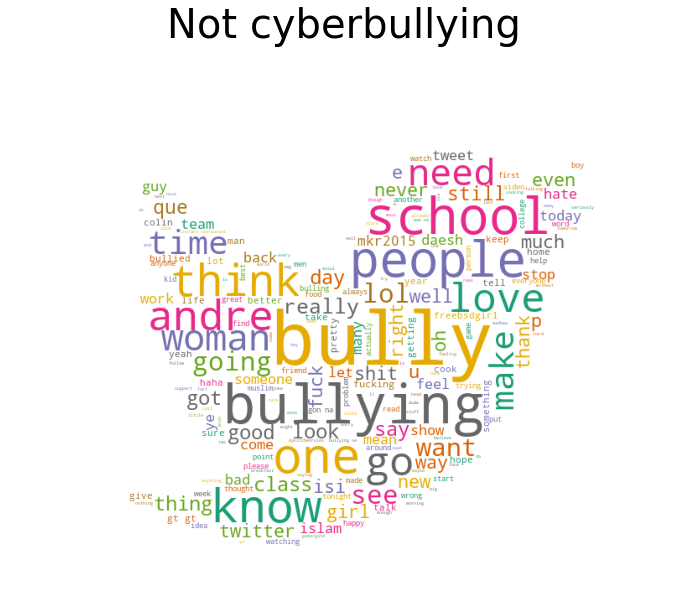

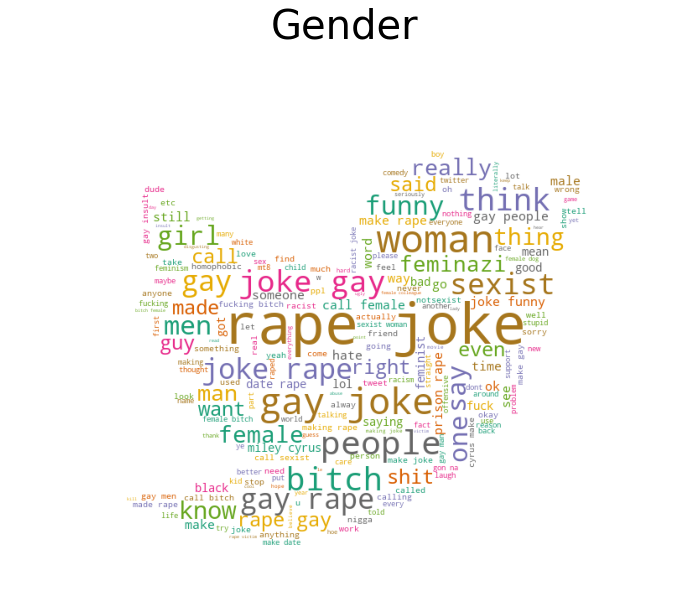

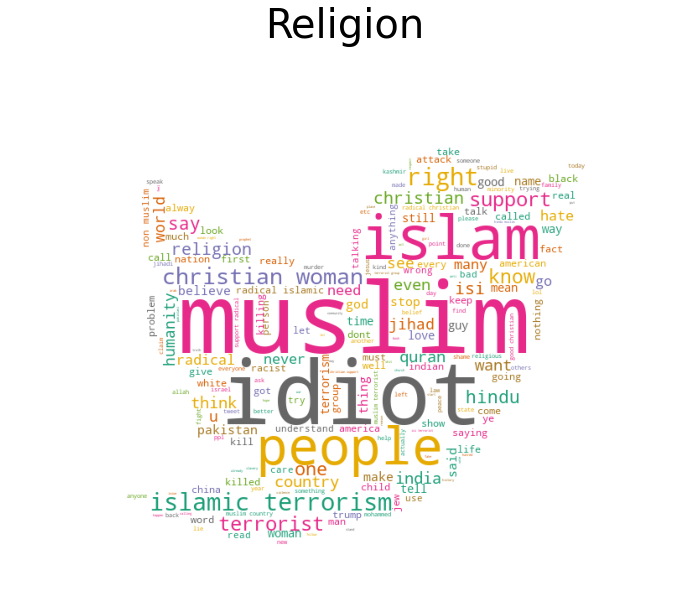

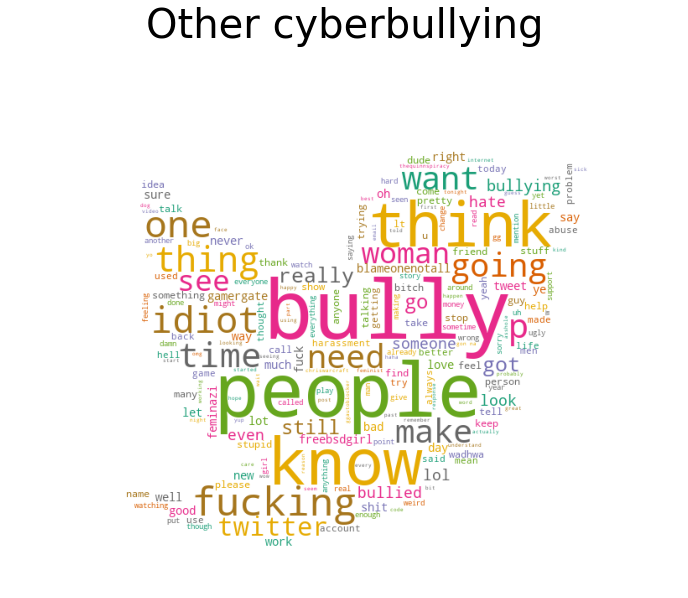

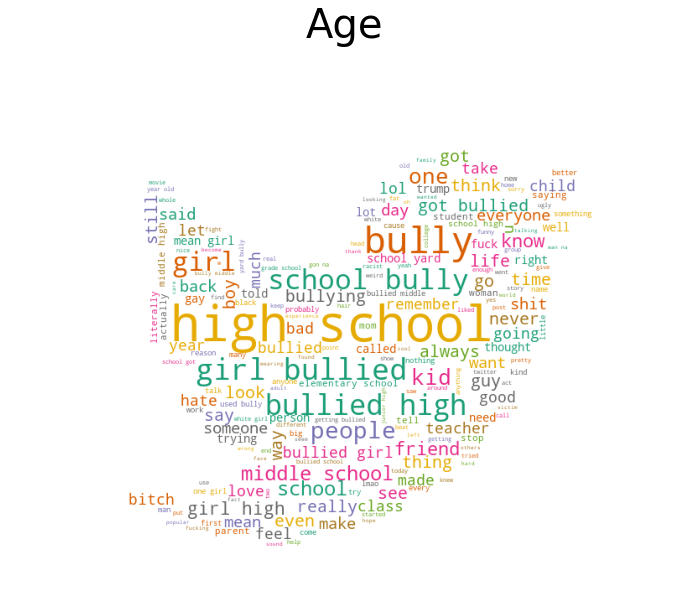

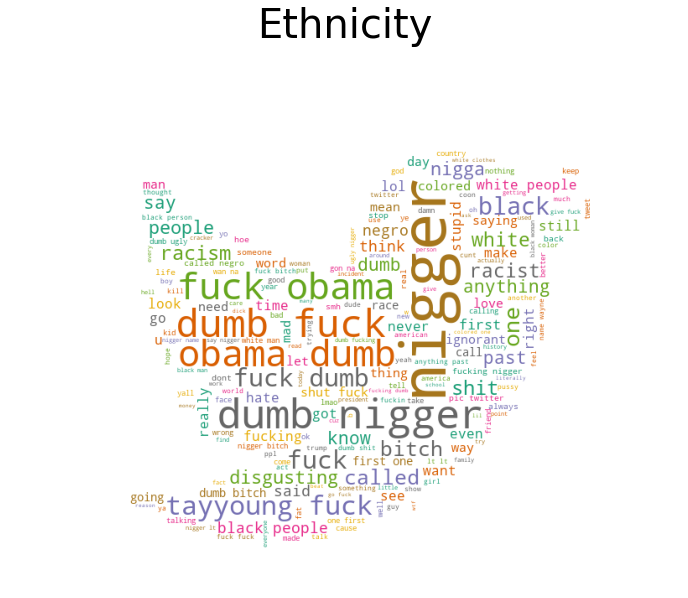

In [18]:
bully_types = list(df['cyberbullying_type'].unique())
for bully in bully_types:
    plot_wordcloud(bully)

In [19]:
# Top N-gram analysis function with CountVectorizer
def get_top_n_gram(corpus, ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
'''Plot bigrams using a function'''
def plot_bigrams(bully_label):
    tweet_subset = df[df['cyberbullying_type']==bully_label]
    tweet_text = tweet_subset.lemmatized_tweets.values
    bigrams_series = get_top_n_gram(tweet_text, [2,2], 10)
    idx, values = zip(*bigrams_series)
    bigrams_series = pd.Series(values, idx)
    if '_' in bully_label:
            bully_label = ' '.join(bully_label.split('_'))
    plot_title = bully_label.capitalize()
    countplot = bigrams_series.sort_values().plot.barh(color='blue', width=.9, 
                                                       figsize=(10, 6), title=plot_title)
    countplot = countplot.bar_label(countplot.containers[0])

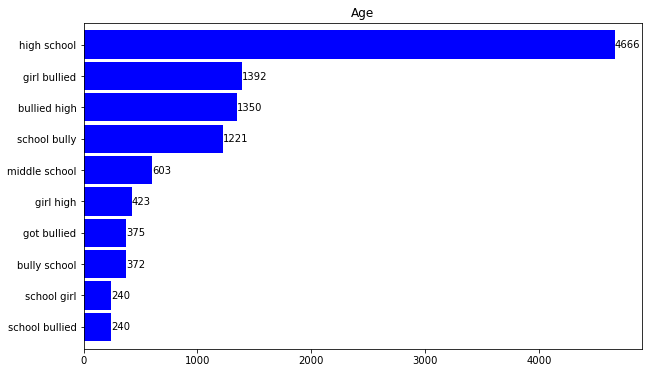

In [21]:
plot_bigrams('age')

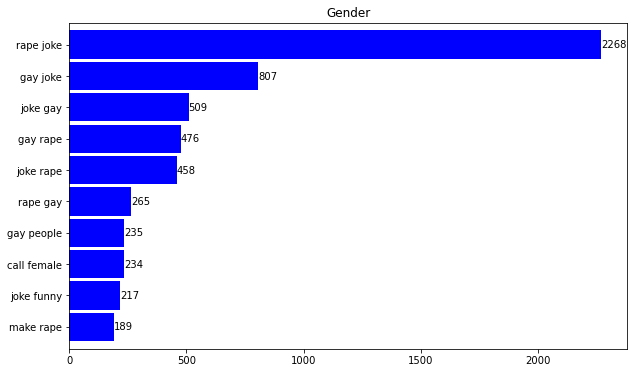

In [22]:
plot_bigrams('gender')

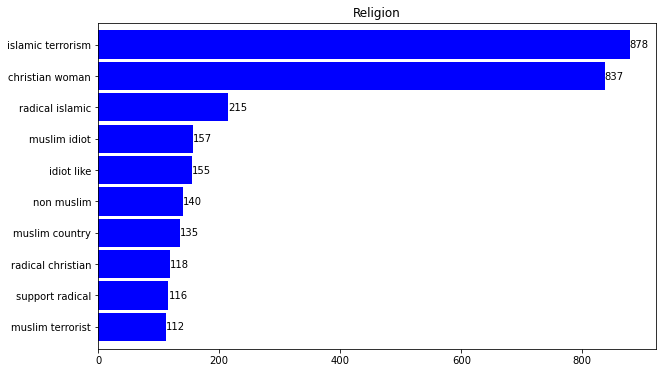

In [23]:
plot_bigrams('religion')

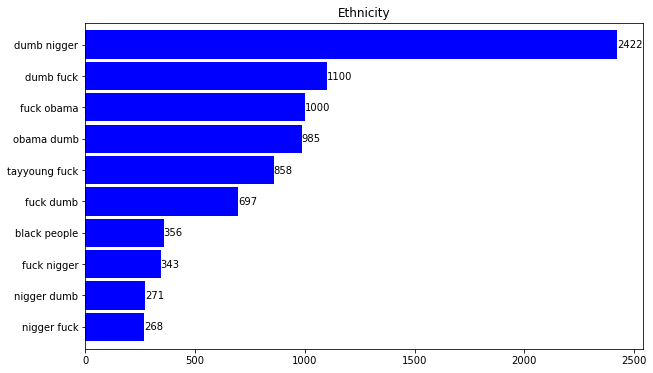

In [24]:
plot_bigrams('ethnicity')

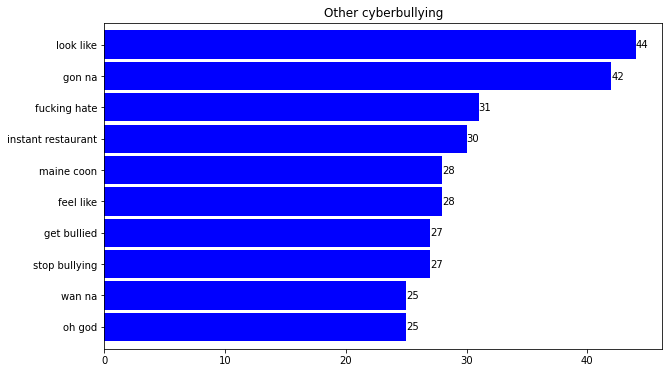

In [25]:
plot_bigrams('other_cyberbullying')

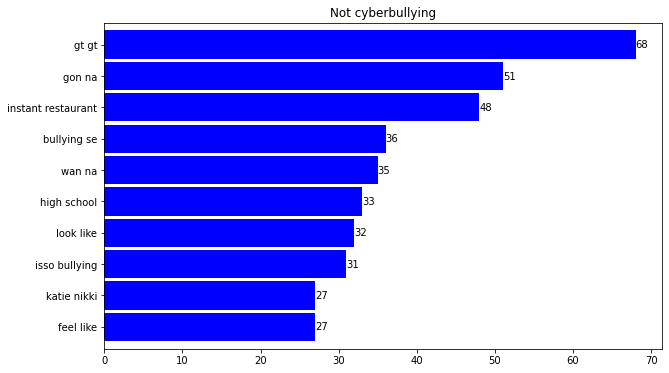

In [26]:
plot_bigrams('not_cyberbullying')

In [27]:
'''Plot trigrams using a function'''
def plot_trigrams(bully_label):
    tweet_subset = df[df['cyberbullying_type']==bully_label]
    tweet_text = tweet_subset.lemmatized_tweets.values
    bigrams_series = get_top_n_gram(tweet_text, [3,3], 10)
    idx, values = zip(*bigrams_series)
    bigrams_series = pd.Series(values, idx)
    if '_' in bully_label:
            bully_label = ' '.join(bully_label.split('_'))
    plot_title = bully_label.capitalize()
    countplot = bigrams_series.sort_values().plot.barh(color='blue', width=.9, 
                                                       figsize=(10, 6), title=plot_title)
    countplot = countplot.bar_label(countplot.containers[0])

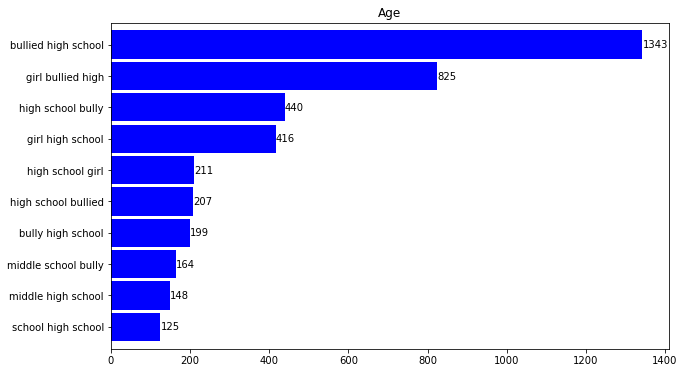

In [28]:
plot_trigrams('age')

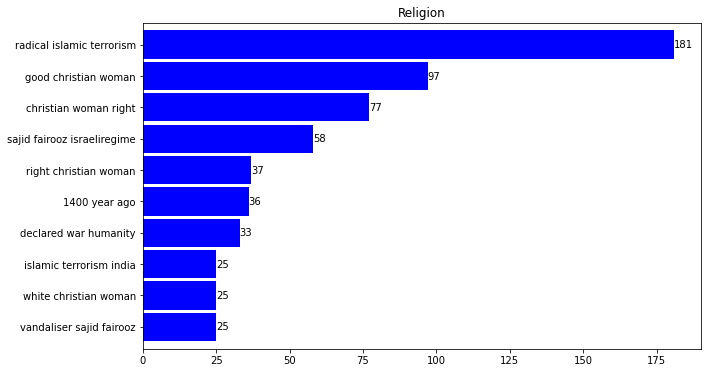

In [29]:
plot_trigrams('religion')

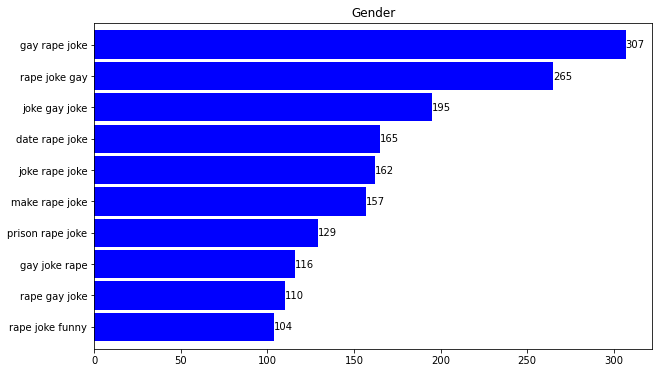

In [30]:
plot_trigrams('gender')

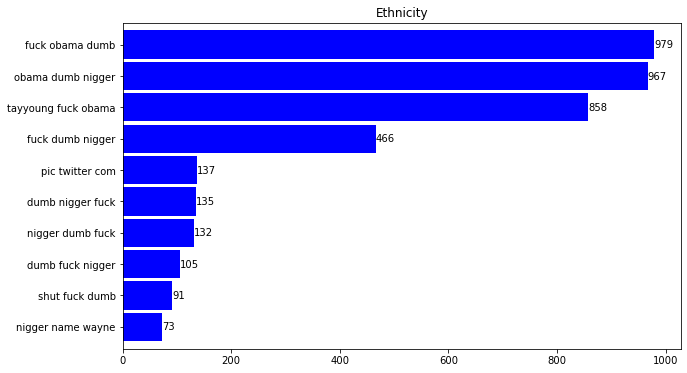

In [31]:
plot_trigrams('ethnicity')

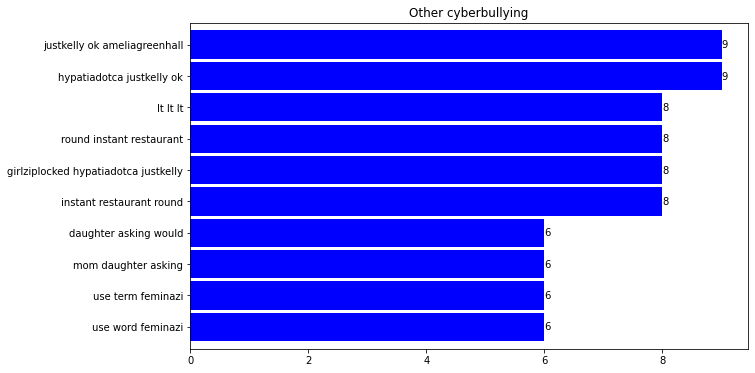

In [32]:
plot_trigrams('other_cyberbullying')

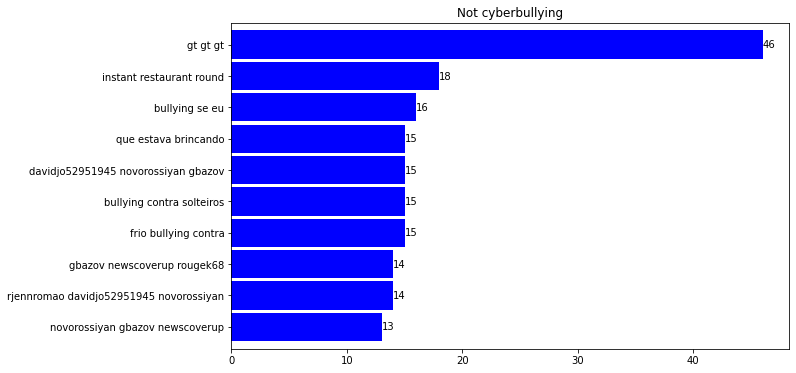

In [33]:
plot_trigrams('not_cyberbullying')

In [34]:
# Top N-gram analysis function with TfidfVectorizer
def get_top_n_gram(corpus, ngram_range,n=None):
    vec = TfidfVectorizer(ngram_range=ngram_range,stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [35]:
'''Plot bigrams using a function'''
def plot_bigrams(bully_label):
    tweet_subset = df[df['cyberbullying_type']==bully_label]
    tweet_text = tweet_subset.lemmatized_tweets.values
    bigrams_series = get_top_n_gram(tweet_text, [2,2], 10)
    idx, values = zip(*bigrams_series)
    bigrams_series = pd.Series(values, idx)
    if '_' in bully_label:
            bully_label = ' '.join(bully_label.split('_'))
    plot_title = bully_label.capitalize()
    countplot = bigrams_series.sort_values().plot.barh(color='blue', width=.9, 
                                                       figsize=(10, 6), title=plot_title)
    countplot = countplot.bar_label(countplot.containers[0])

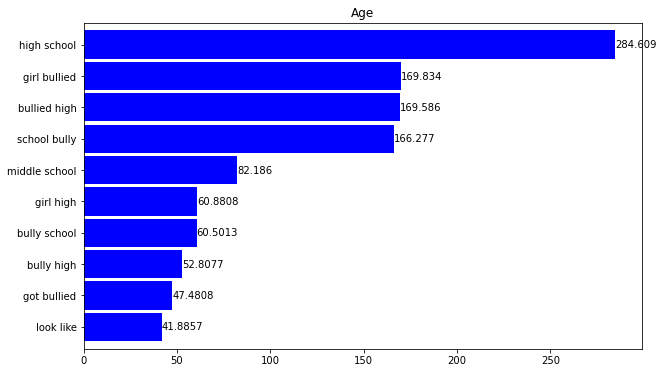

In [36]:
plot_bigrams('age')

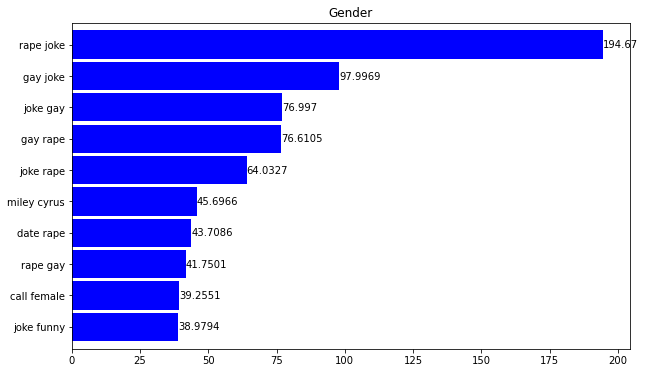

In [37]:
plot_bigrams('gender')

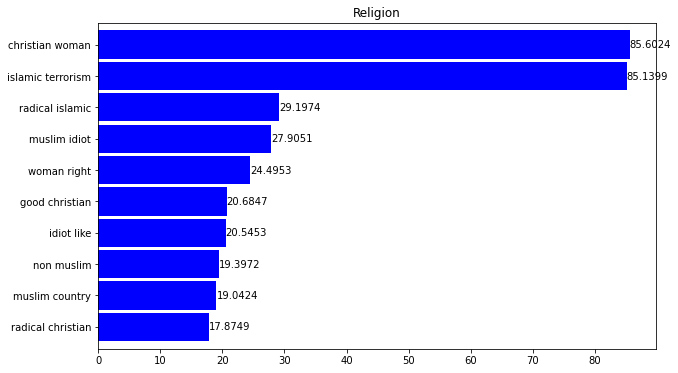

In [38]:
plot_bigrams('religion')

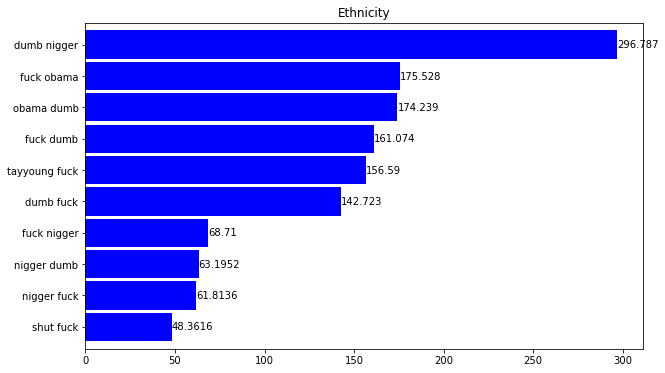

In [39]:
plot_bigrams('ethnicity')

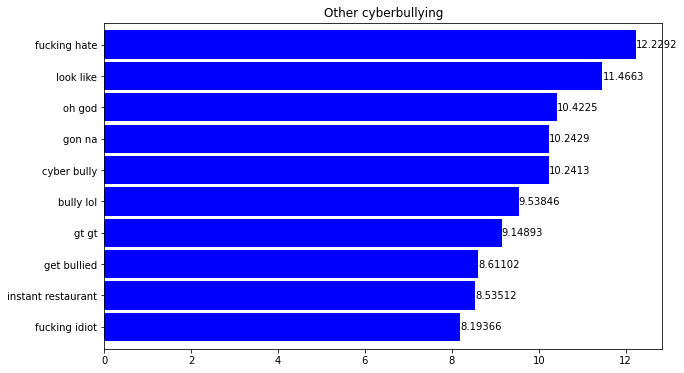

In [40]:
plot_bigrams('other_cyberbullying')

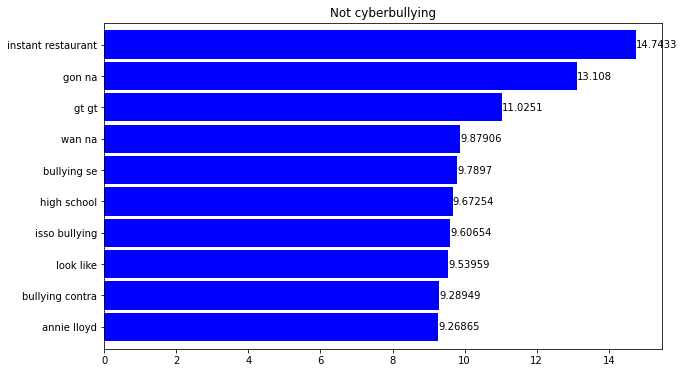

In [41]:
plot_bigrams('not_cyberbullying')

In [42]:
'''Plot trigrams using a function'''
def plot_trigrams(bully_label):
    tweet_subset = df[df['cyberbullying_type']==bully_label]
    tweet_text = tweet_subset.lemmatized_tweets.values
    bigrams_series = get_top_n_gram(tweet_text, [3,3], 10)
    idx, values = zip(*bigrams_series)
    bigrams_series = pd.Series(values, idx)
    if '_' in bully_label:
            bully_label = ' '.join(bully_label.split('_'))
    plot_title = bully_label.capitalize()
    countplot = bigrams_series.sort_values().plot.barh(color='blue', width=.9, 
                                                       figsize=(10, 6), title=plot_title)
    countplot = countplot.bar_label(countplot.containers[0])

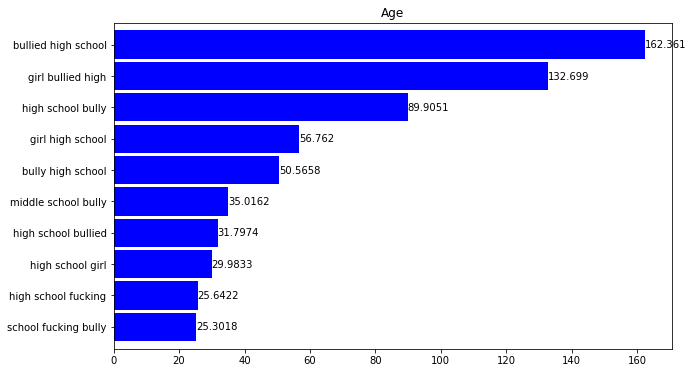

In [43]:
plot_trigrams('age')

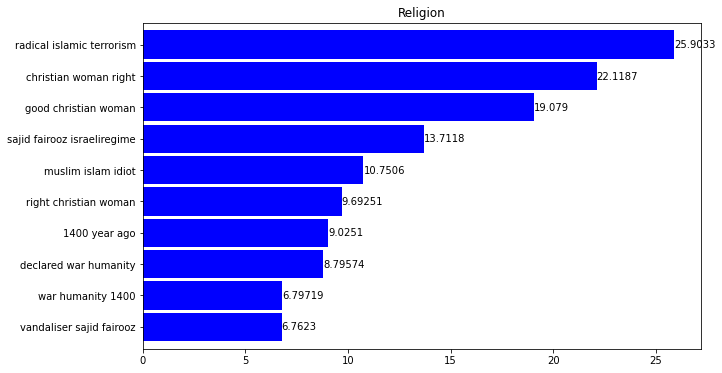

In [44]:
plot_trigrams('religion')

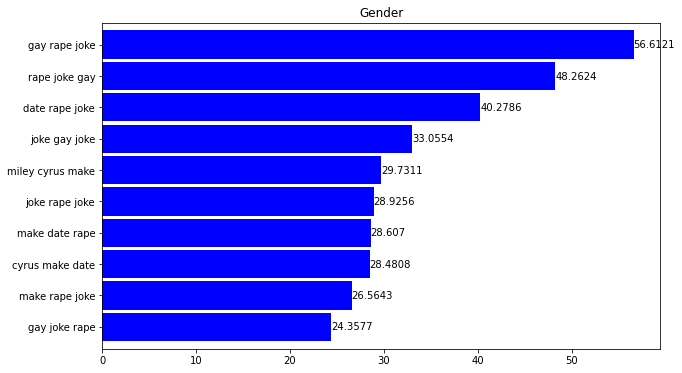

In [45]:
plot_trigrams('gender')

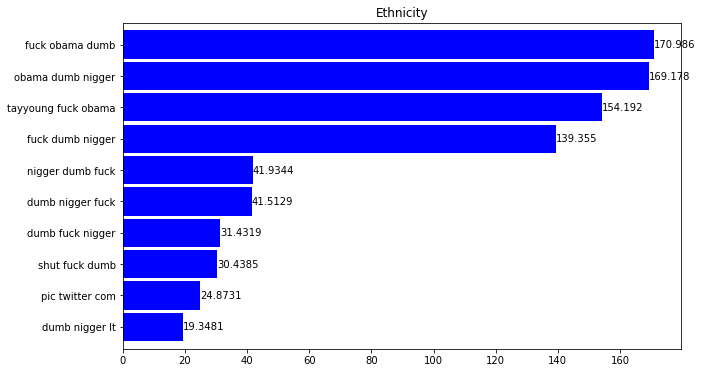

In [46]:
plot_trigrams('ethnicity')

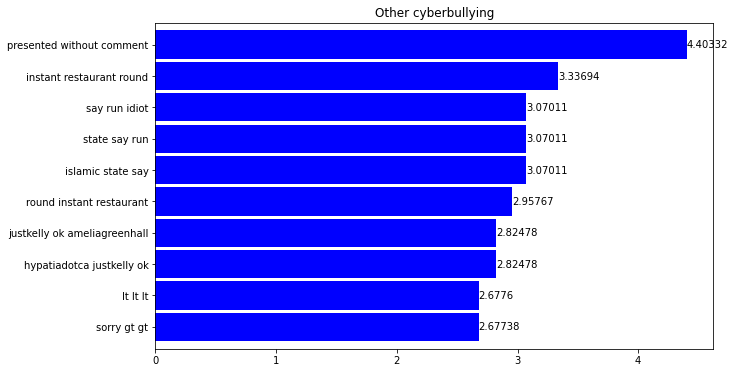

In [47]:
plot_trigrams('other_cyberbullying')

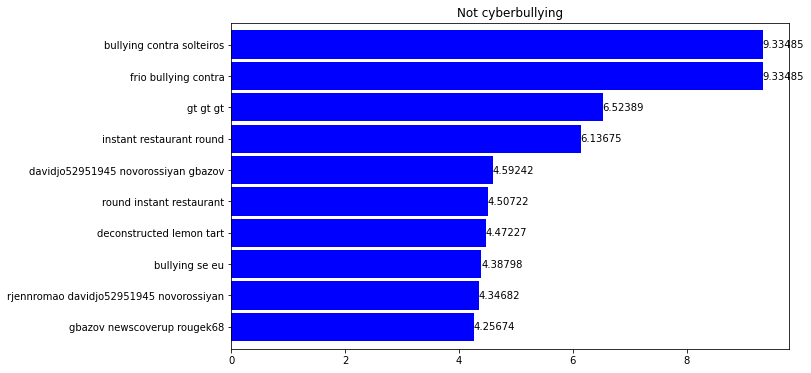

In [48]:
plot_trigrams('not_cyberbullying')